In [8]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [9]:
all_df = pd.read_csv("data/star.csv")

In [10]:
X=all_df.drop(['target_class'], axis=1).values.astype('float64')

In [11]:
Y = all_df['target_class'].values.astype('int64')

In [12]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

14318

In [13]:
test_Features[:2]

array([[-0.17610439, -0.03233402, -0.03304459, -0.30800098,  2.72763109,
         3.42581353, -1.8008325 , -1.00060536],
       [-1.89957861, -1.28100252,  2.39730283,  1.79667065,  0.98835635,
         2.27972835, -1.4693661 , -0.96845994]])

In [14]:
train_Label[:4]

array([0, 0, 0, 0])

In [15]:
train_Features.shape

(14318, 8)

In [16]:
test_Label[:4]

array([0, 1, 0, 0])

In [17]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [18]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [19]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

Using TensorFlow backend.


In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [21]:
model = Sequential()

In [22]:
model.add(SimpleRNN(units=16, input_shape=(8,1)))

In [23]:
model.add(Dense(2, activation = "sigmoid"))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [26]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 11454 samples, validate on 2864 samples
Epoch 1/60
11454/11454 [==============================] - 2s 151us/step - loss: 0.6194 - acc: 0.6577 - val_loss: 0.5872 - val_acc: 0.7044
Epoch 2/60
11454/11454 [==============================] - 0s 18us/step - loss: 0.5701 - acc: 0.7204 - val_loss: 0.5387 - val_acc: 0.7593
Epoch 3/60
11454/11454 [==============================] - 0s 21us/step - loss: 0.5181 - acc: 0.7821 - val_loss: 0.4828 - val_acc: 0.8235
Epoch 4/60
11454/11454 [==============================] - 0s 22us/step - loss: 0.4552 - acc: 0.8514 - val_loss: 0.4125 - val_acc: 0.8870
Epoch 5/60
11454/11454 [==============================] - 0s 21us/step - loss: 0.3772 - acc: 0.9133 - val_loss: 0.3311 - val_acc: 0.9230
Epoch 6/60
11454/11454 [==============================] - 0s 25us/step - loss: 0.2955 - acc: 0.9403 - val_loss: 0.2589 - val_acc: 0.9464
Epoch 7/60
11454/11454 [==============================] - 0s 26us/step - loss: 0.2328 - acc: 0.9546 - val_loss: 0.2170 - val_acc

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

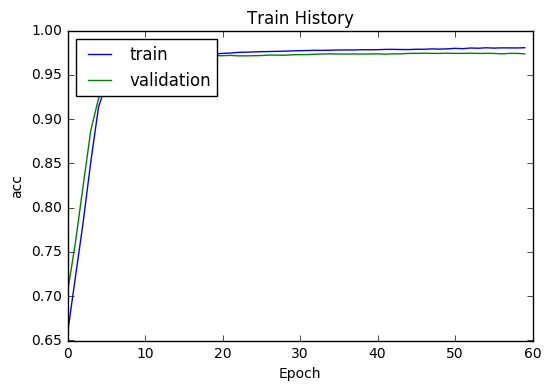

In [28]:
show_train_history(train_history,'acc','val_acc')

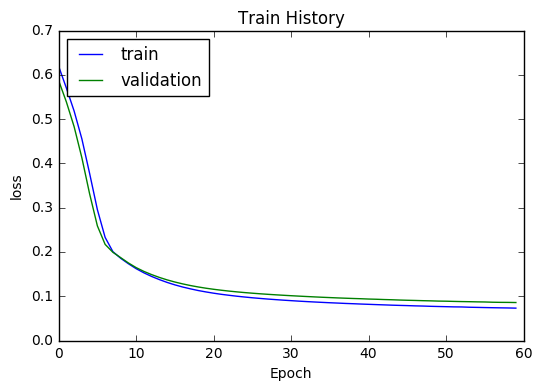

In [29]:
show_train_history(train_history,'loss','val_loss')

In [30]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3580/3580 [==============================] - 0s 100us/step


In [31]:
scores[1]

0.9791899442672729